<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/LabWK_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating the DataFrame
air = pd.read_csv('/content/co2.csv')
air

,0
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


In [ ]:
# Renaiming Columns
air.columns = ['CO2']
air

,CO2
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


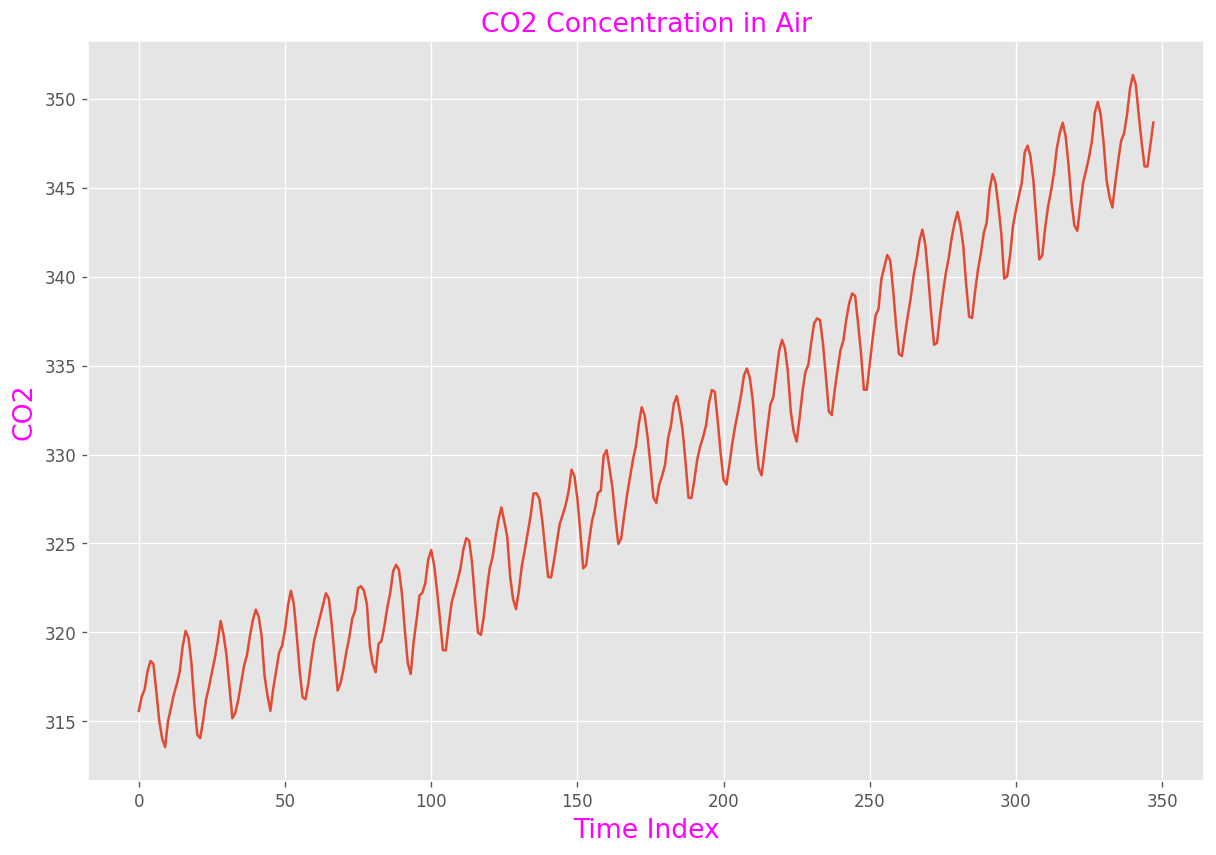

In [ ]:
# Plotting the Air Pollution TS
plt.style.use('ggplot')
plt.figure(figsize = (12,8), dpi = 120)
plt.xlabel('Time Index', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 16})
plt.ylabel('CO2', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 16})
plt.title('CO2 Concentration in Air', color = 'magenta', fontdict ={'fontweight':'normal', 'fontstyle':'normal', 'fontsize': 16})

plt.plot(air)
plt.show()

In [ ]:
# Let's run the Augmented Dickey Fuller Test (ADF_Test) and the Kwaitkowski-Phillips-Schmidt-Shin Test (KPSS_Test)
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(air['CO2'])
print('ADF Test: p-value = %f'  %adf_test[1]) # Based on the result, ADF p-value > 0.05 ===> TS non-stationary

kpss_test = kpss(air['CO2'])
print('KPSS Test: p-value = %f' %kpss_test[1]) # Based on the result, KPSS p-value < 0.05 ===> TS non-stationary

ADF Test: p-value = 1.000000
KPSS Test: p-value = 0.010000


/tmp/ipython-input-2413982838.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(air['CO2'])


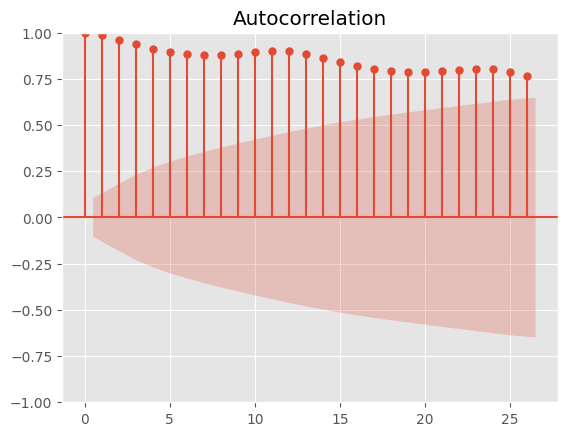

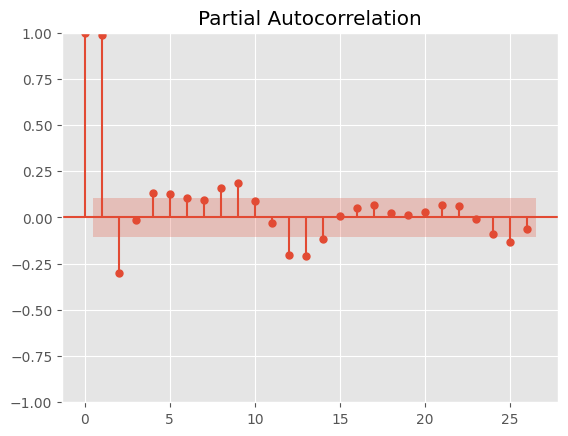

In [ ]:
# Defining the values related to ARIMA model (p,d,q) - For that, we will use/plot the ACF and the PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(air), plot_pacf(air)
plt.show()

"""
1- From the autocorrelation plot, we can see that there is many signicant lags, therefore we will select from the value of q = 0, 1, 2, 3, ...
2- From the autocorrelation plot, we can see that there is many signicant lags, therefore we will select from the value of p = 0, 1, 2, 3, ...

"""


'\nAnalysing the differencing plots, the 1st order differencing seems to be enough to make the TS stationary., therefore d=1.\n'

<Figure size 1440x960 with 0 Axes>

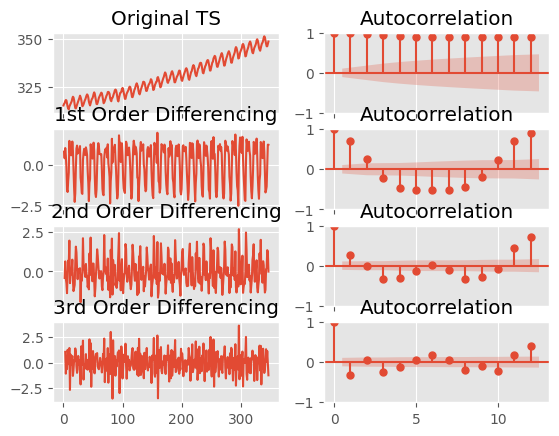

In [ ]:
# Let's Implementing the Differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Original TS
plt.figure(figsize = (12,8), dpi = 120)
fig,axes = plt.subplots(4,2, sharex = 'col')
axes[0,0].plot(air); axes[0,0].set_title('Original TS')
plot_acf(air, lags = 12, ax = axes[0,1])

# Plotting the 1st Order Differencing
axes[1,0].plot(air.diff()); axes[1,0].set_title('1st Order Differencing')
plot_acf(air.diff().dropna(), lags = 12, ax = axes[1,1])

# Plotting the 2nd Order Differencing
axes[2,0].plot(air.diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(air.diff().diff().dropna(), lags = 12, ax = axes[2,1])

# Plotting the 3rd Order Differencing
axes[3,0].plot(air.diff().diff().diff()); axes[3,0].set_title('3rd Order Differencing')
plot_acf(air.diff().diff().diff().dropna(), lags = 12, ax = axes[3,1])

"""
Analysing the differencing plots, the 1st order differencing seems to be enough to make the TS stationary., therefore d=1.

We will have the following ARIMA model:
ARIMA(1,1,0) - ARIMA(0,1,1) v - ARIMA(0,1,2) - ARIMA(0,1,3) - ARIMA(1,1,1) - ARIMA(1,1,) - ARIMA(1,1,3)
"""

In [ ]:
# Let' Create Different ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order = (0,1,1))
model_fit = model.fit()
model_fit.summary()

"""
1- Based on the ARIMA models built the ones that have lower values of Akaike Information Criterion (AIC), good to assess predictive and
Bayesian Information Criterion (BIC) good to assess the model complexity, and the smaller the best.

"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -442.920
Date:                Thu, 08 Jan 2026   AIC                            889.839
Time:                        14:19:39   BIC                            897.538
Sample:                             0   HQIC                           892.905
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6562      0.044     14.864      0.000       0.570       0.743
sigma2         0.7508      0.075      9.981      0.000       0.603       0.898
===================================================================================
Ljung-Box (L1) (Q):                  30.35   Jarque-Bera (JB):                10.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.23
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 2 nd ARIMA model
model = ARIMA(air, order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -427.101
Date:                Thu, 08 Jan 2026   AIC                            858.201
Time:                        14:21:01   BIC                            865.900
Sample:                             0   HQIC                           861.266
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7059      0.043     16.558      0.000       0.622       0.789
sigma2         0.6851      0.063     10.813      0.000       0.561       0.809
===================================================================================
Ljung-Box (L1) (Q):                  42.16   Jarque-Bera (JB):                 5.79
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.13   Skew:                             0.16
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 3rd ARIMA Model
model = ARIMA(air, order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  348
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -403.784
Date:                Thu, 08 Jan 2026   AIC                            813.568
Time:                        14:21:43   BIC                            825.116
Sample:                             0   HQIC                           818.166
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5730      0.060      9.482      0.000       0.455       0.691
ma.L1          0.3545      0.067      5.287      0.000       0.223       0.486
sigma2         0.5986      0.052     11.436      0.000       0.496       0.701
===================================================================================
Ljung-Box (L1) (Q):                   2.38   Jarque-Bera (JB):                 3.91
Prob(Q):                              0.12   Prob(JB):                         0.14
Heteroskedasticity (H):               1.04   Skew:                             0.20
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""